In [2]:
import os, sys

In [3]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "ftse" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("indset_quant_%s_res.csv" % (dataset))
class_res_df = pd.read_csv("indset_class_%s_res.csv" % (dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])

In [4]:
assert quant_res_df.shape == class_res_df.shape and quant_res_df.columns.equals(class_res_df.columns)

<Figure size 432x288 with 0 Axes>

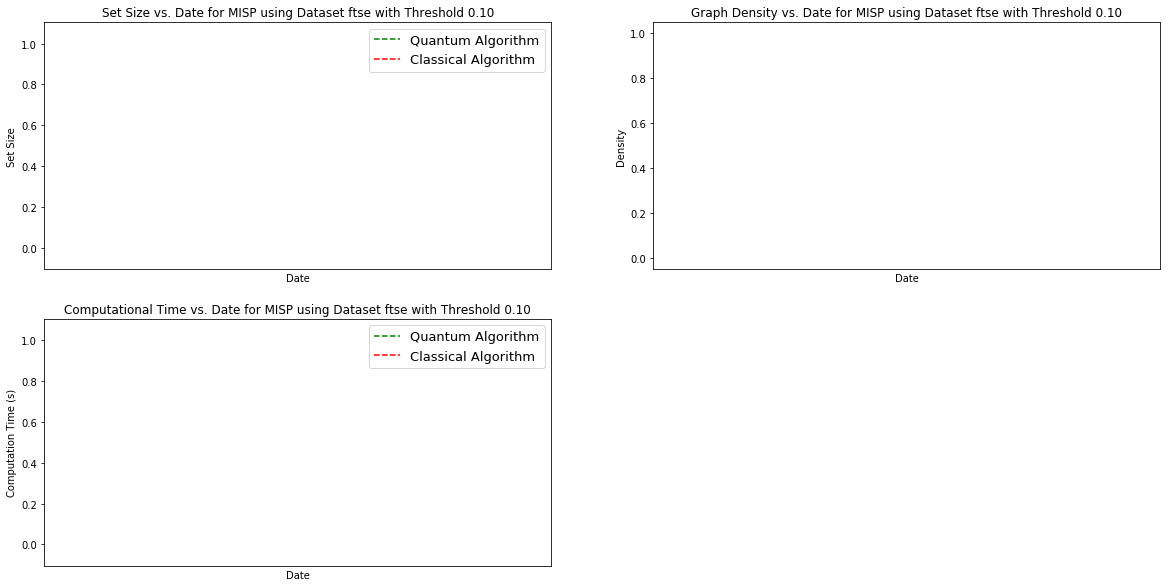

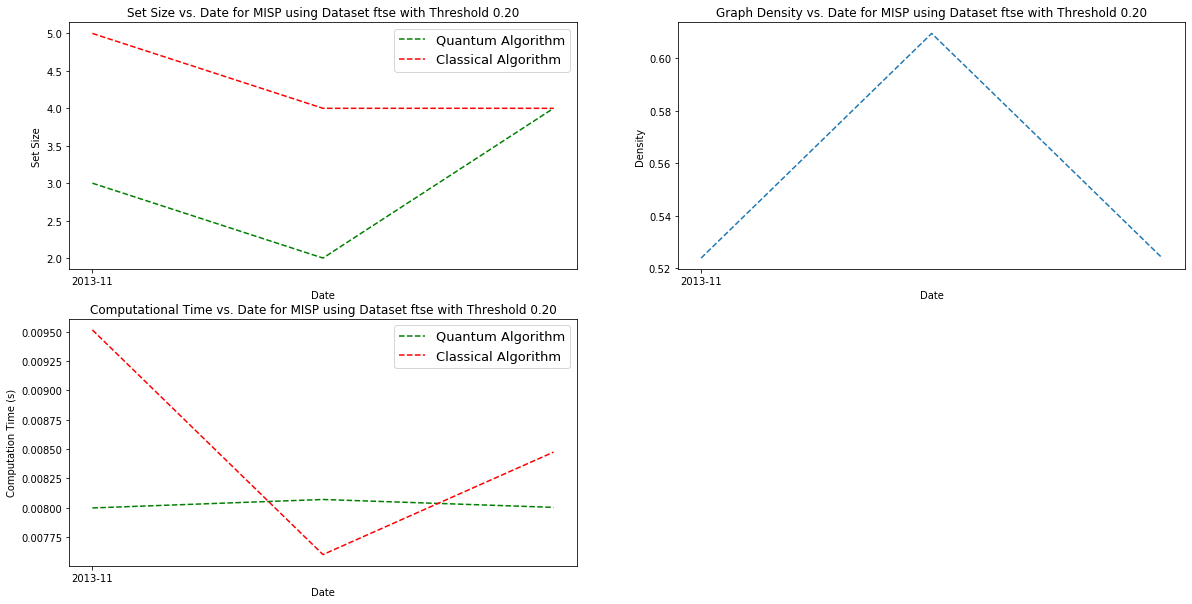

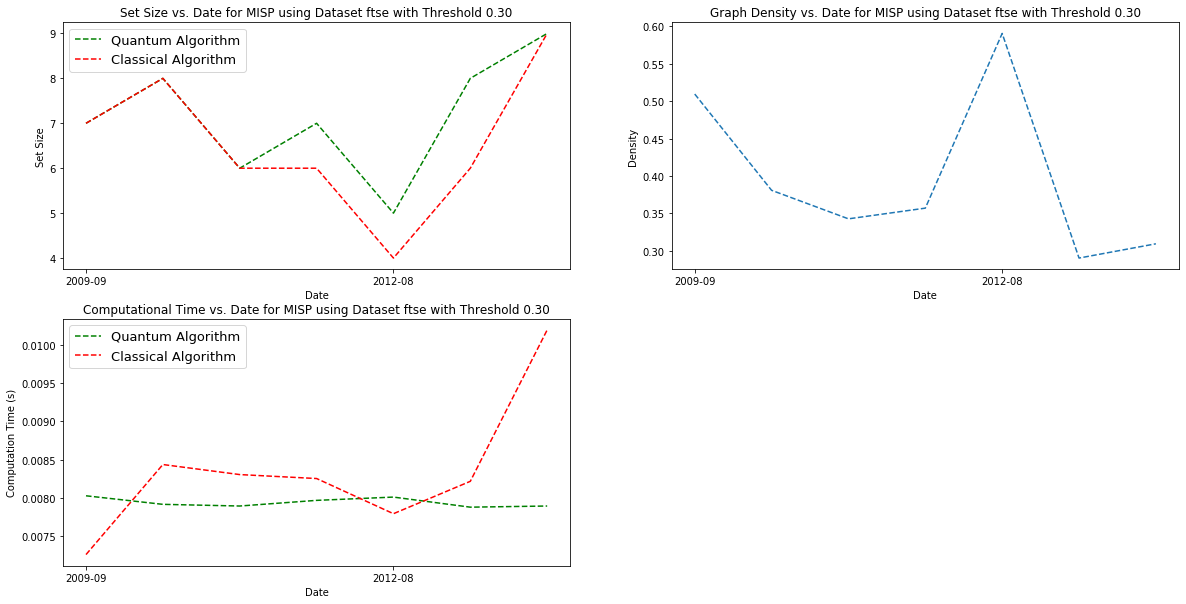

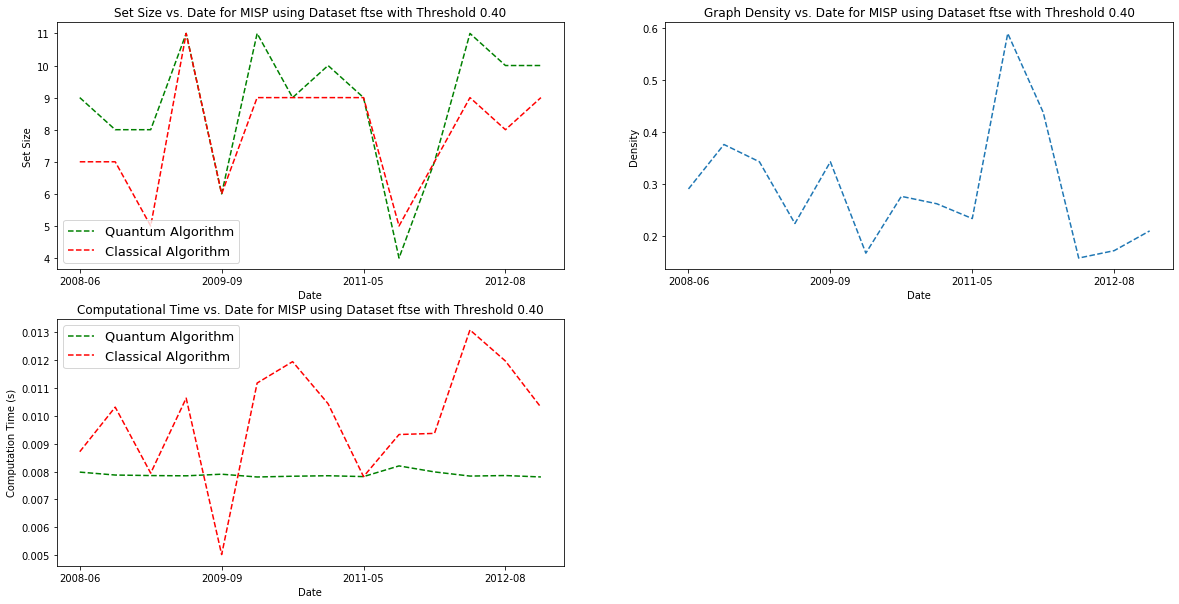

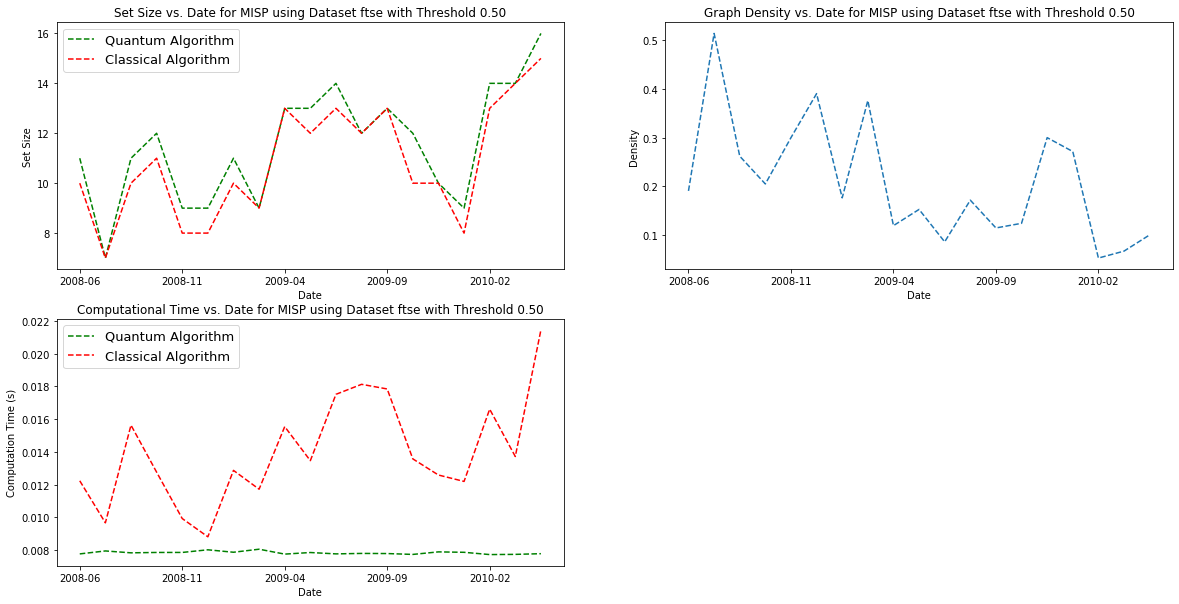

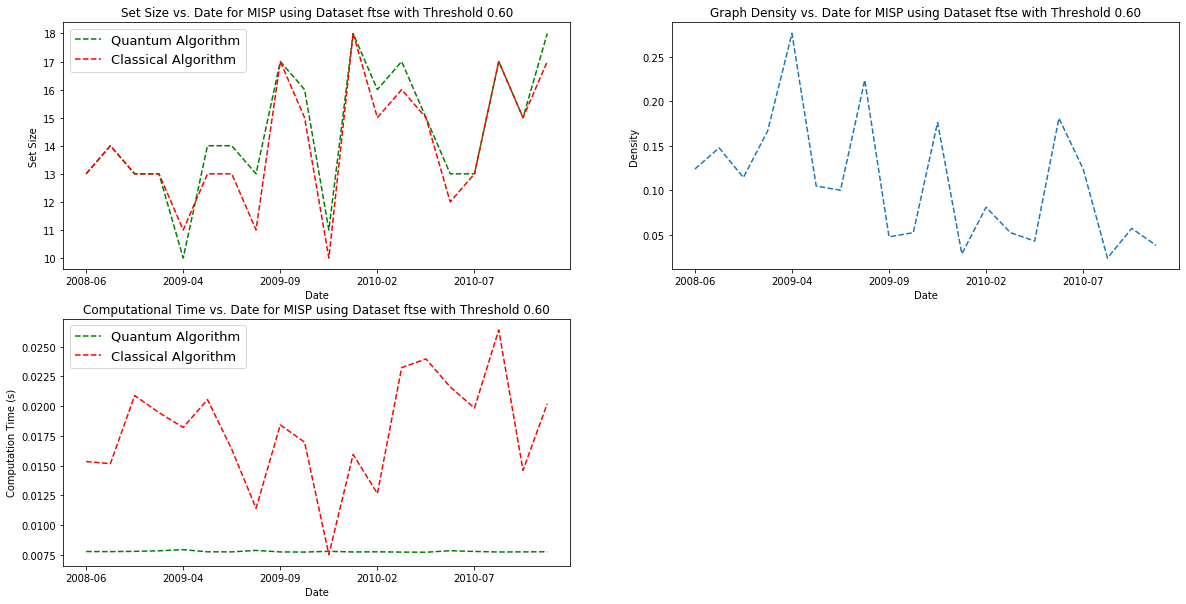

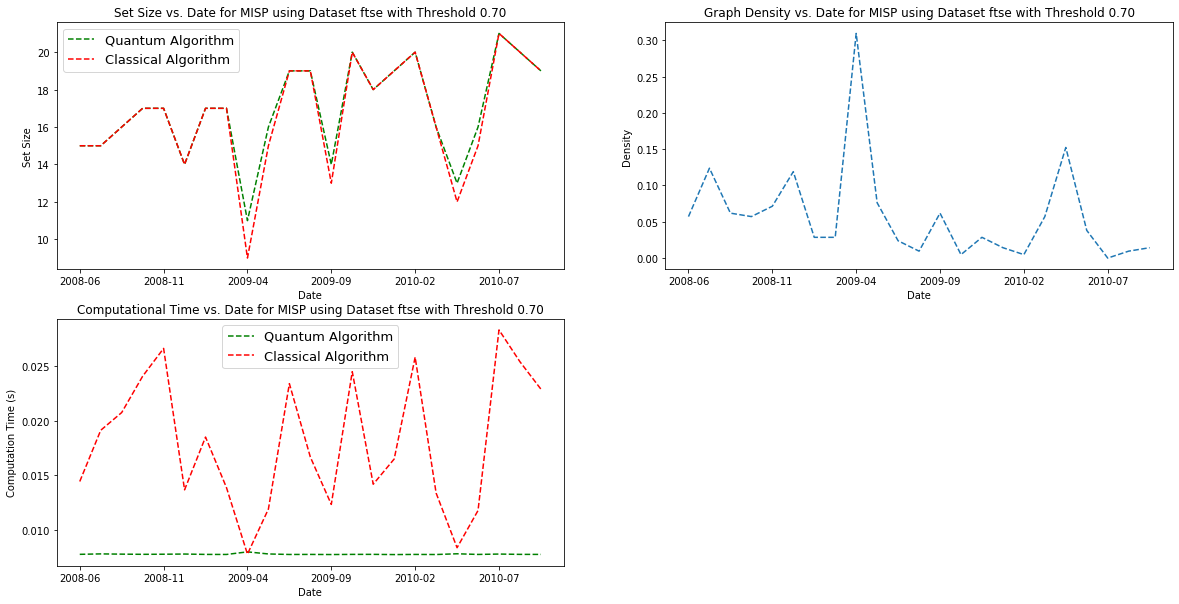

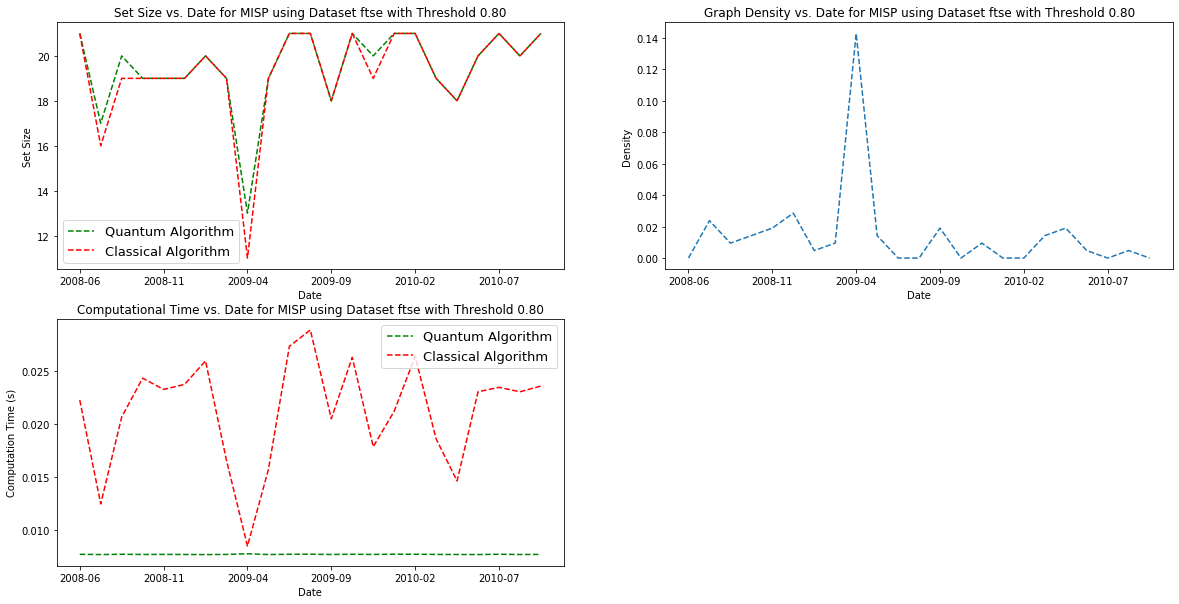

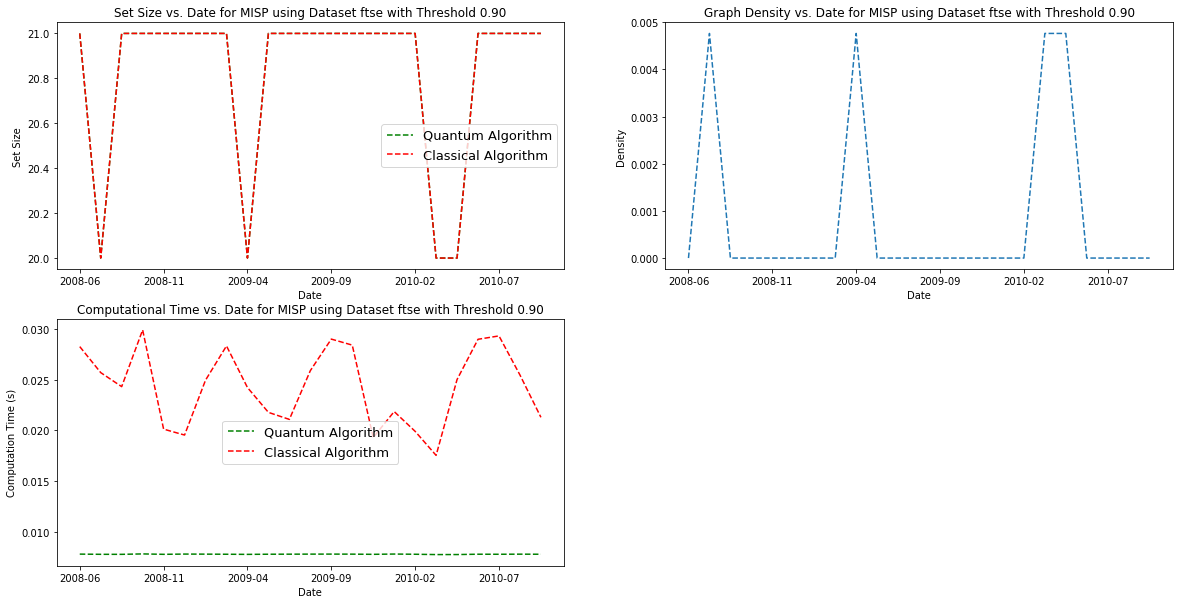

In [7]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & 
                                (quant_res_df.valid_soln == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & 
                                (class_res_df.valid_soln == True)]
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    assert quant_series.shape == class_series.shape
    
    fig = plt.figure(i)
    plt.subplots(figsize=(20,10))
    
    plt.subplot(221)
    plt.title('Set Size vs. Date for MISP using Dataset %s with Threshold %.2f' % (dataset, thresh))
    plt.ylabel('Set Size')
    plt.xlabel('Date')
    
    plt.plot(quant_series["date"], quant_series['set_size'], 'g--', label='Quantum Algorithm')
    plt.plot(quant_series["date"], class_series['set_size'], 'r--', label='Classical Algorithm')
    plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::4], 
              labels=[x[0:7] for x in quant_series['date']])
    
    plt.subplot(222)
    plt.title('Graph Density vs. Date for MISP using Dataset %s with Threshold %.2f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    plt.xticks(ticks=quant_series['date'][::4], 
              labels=[x[0:7] for x in quant_series['date']])
    plt.ylabel("Density")
    plt.xlabel("Date")
    
    
    plt.subplot(223)
    plt.title('Computational Time vs. Date for MISP using Dataset %s with Threshold %.2f' % (dataset, thresh))
    plt.ylabel('Computation Time (s)')
    plt.xlabel('Date')
    
    plt.plot(quant_series["date"], quant_series['computation_time'], 'g--', label='Quantum Algorithm')
    plt.plot(quant_series["date"], class_series['computation_time'], 'r--', label='Classical Algorithm')
    plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::4], 
              labels=[x[0:7] for x in quant_series['date']])
    
    i += 1

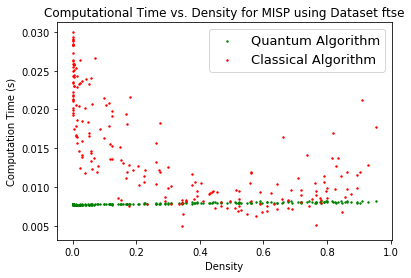

In [10]:
plt.title('Computational Time vs. Density for MISP using Dataset %s' % (dataset))
plt.ylabel('Computation Time (s)')
plt.xlabel('Density')

plt.scatter(quant_res_df["density"], quant_res_df['computation_time'], c='g', s=2, label='Quantum Algorithm')
plt.scatter(class_res_df["density"], class_res_df['computation_time'], c='r', s=2, label='Classical Algorithm')
plt.legend(loc=0, prop={'size': 13})
    